# 4. Цифровая обработка бинарных изображений - Individual task


### Изменить размер изображения коэффициентом масштабирования

In [230]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [231]:
# Функция для вывода изображения
def img_print(original, res):
    pose = [121, 122]
    signature = ["Оригинал", "Измененное"]
    img = [original, res]
    i = 0
    while i < 2:
        plt.subplot(pose[i])
        plt.title(signature[i])
        plt.imshow(img[i])
        i += 1

In [232]:
img = cv2.imread('img/ind_cat_art.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

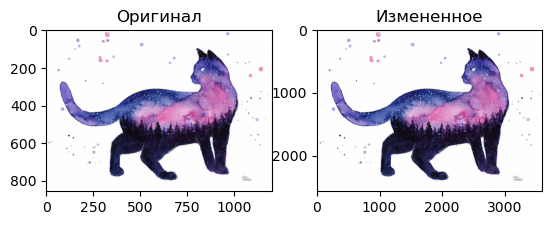

In [233]:
res = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
height, width = img.shape[:2]
res = cv2.resize(img, (3 * width, 3 * height), interpolation=cv2.INTER_CUBIC)
img_print(img, res);

### Определить размер изображения и сдвинуть изображение на 100 столбцов и 50 строк, определить его центр и повернуть его на 90 градусов.


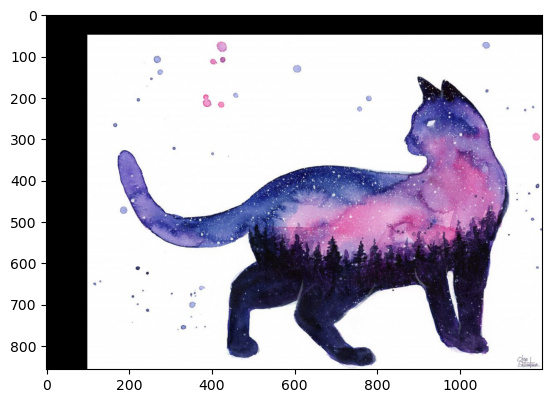

In [234]:
rows, cols, colors = img.shape
M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst);

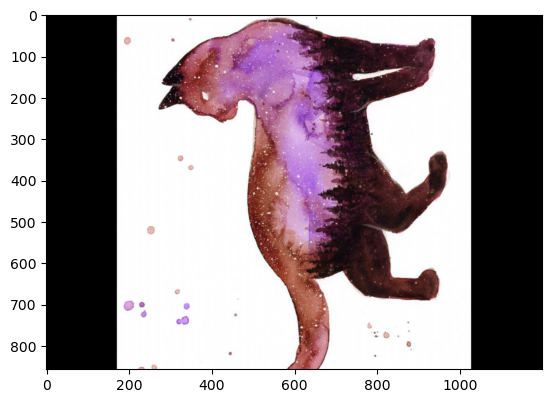

In [235]:
img = cv2.imread('img/ind_cat_art.jpg', 1)
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst);

### Провести охват изображения в прямоугольник, повернутый так, чтобы площадь этого прямоугольника была минимальной.

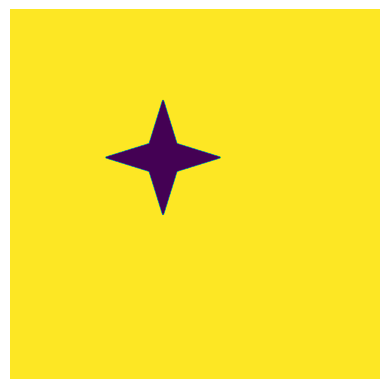

In [236]:
img = cv2.imread('img/ind_tr.jpg', 0)
plt.axis('off')
plt.imshow(img);

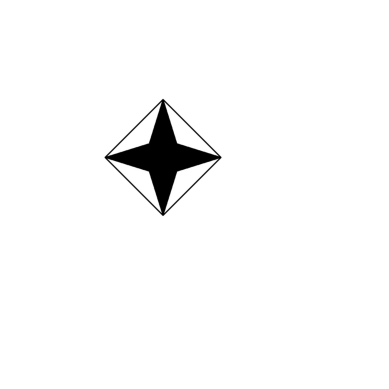

In [237]:
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 1, 1)

cnt = contours[0]
rect = cv2.minAreaRect(cnt)

box = cv2.boxPoints(rect)
box = np.intp(box)

imp = cv2.drawContours(img, [box], 0, (0, 0, 255), 2)
imp = cv2.cvtColor(imp, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(imp);

### Нарисовать прямоугольник в месте, где нужно вырезать фрагмент, вывести на экран фрагмент, ограниченный прямоугольником, увеличив этот фрагмент. Определить размер изображения, его центр и повернуть его на 90 градусов.

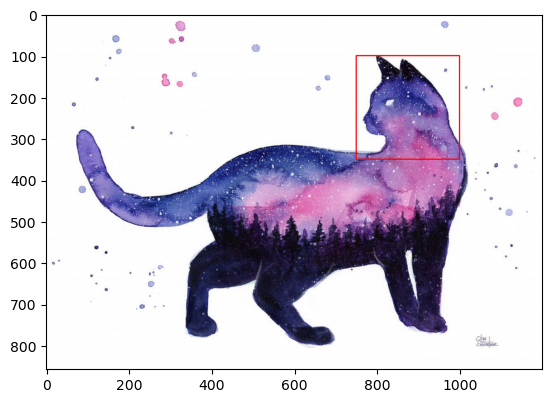

In [238]:
img = cv2.imread('img/ind_cat_art.jpg', 1)
image = cv2.rectangle(img, (750, 100), (1000, 350), (0, 0, 255), 2)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image);

200 100


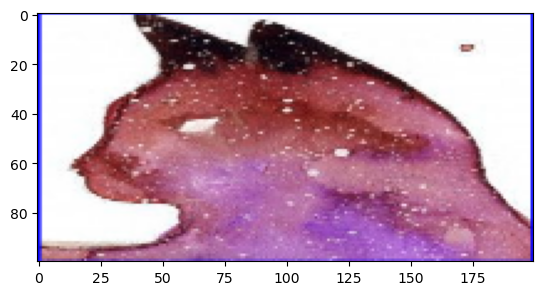

In [239]:
crop = img[100:350, 750:1000]
piece = cv2.resize(crop, (200, 100), interpolation=cv2.INTER_LINEAR)

(h, w) = piece.shape[:2]
print(w, h)

plt.imshow(piece);

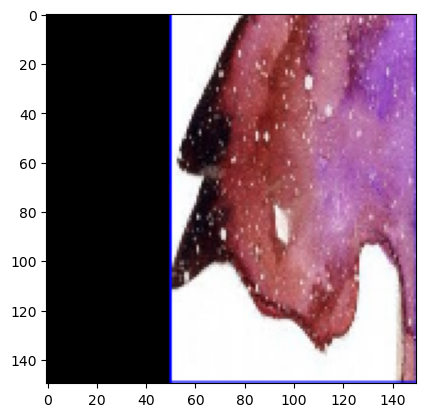

In [240]:
plt.imshow(piece);
center = (w / 2, h / 2)
M = cv2.getRotationMatrix2D(center, 90, 1)
rotated = cv2.warpAffine(piece, M, (150, 150))

plt.imshow(rotated);